In [15]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.1 MB/s eta 0:00:00


In [16]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk, FreqDist

In [19]:
text = """
Natural Language Processing (NLP) enables computers to understand, interpret, 
and generate human language. It is widely used in chatbots, machine translation, 
and sentiment analysis.
"""

In [20]:
sentences = sent_tokenize(text)
words = word_tokenize(text)

print("Sentences:", sentences)
print("Words:", words)


Sentences: ['\nNatural Language Processing (NLP) enables computers to understand, interpret, \nand generate human language.', 'It is widely used in chatbots, machine translation, \nand sentiment analysis.']
Words: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'enables', 'computers', 'to', 'understand', ',', 'interpret', ',', 'and', 'generate', 'human', 'language', '.', 'It', 'is', 'widely', 'used', 'in', 'chatbots', ',', 'machine', 'translation', ',', 'and', 'sentiment', 'analysis', '.']


In [21]:
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [22]:
pos_tags = pos_tag(words)
print("POS Tags:")
print(pos_tags)

POS Tags:
[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('enables', 'VBZ'), ('computers', 'NNS'), ('to', 'TO'), ('understand', 'VB'), (',', ','), ('interpret', 'VB'), (',', ','), ('and', 'CC'), ('generate', 'VB'), ('human', 'JJ'), ('language', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('widely', 'RB'), ('used', 'VBN'), ('in', 'IN'), ('chatbots', 'NNS'), (',', ','), ('machine', 'NN'), ('translation', 'NN'), (',', ','), ('and', 'CC'), ('sentiment', 'NN'), ('analysis', 'NN'), ('.', '.')]


In [23]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]

print("Filtered Words:", filtered_words)

Filtered Words: ['Natural', 'Language', 'Processing', 'NLP', 'enables', 'computers', 'understand', 'interpret', 'generate', 'human', 'language', 'widely', 'used', 'chatbots', 'machine', 'translation', 'sentiment', 'analysis']


In [24]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_words]

print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['natural', 'language', 'processing', 'nlp', 'enables', 'computer', 'understand', 'interpret', 'generate', 'human', 'language', 'widely', 'used', 'chatbots', 'machine', 'translation', 'sentiment', 'analysis']


In [25]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

Named Entities:


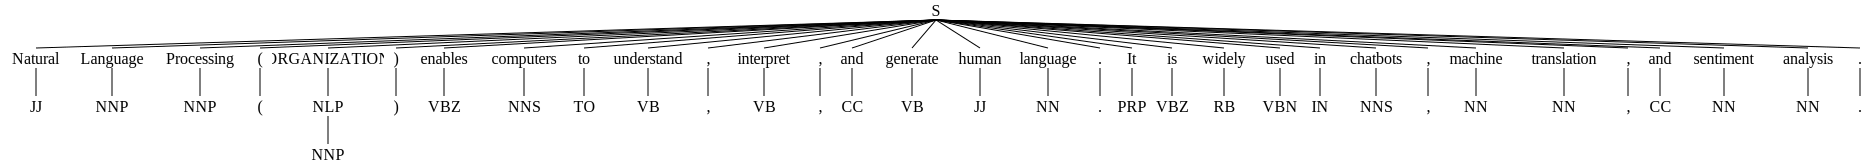

In [26]:
from nltk import ne_chunk

named_entities = ne_chunk(pos_tags)
print("Named Entities:")
named_entities


In [27]:
freq_dist = FreqDist(lemmatized_words)
print("Most Common Words:")
freq_dist.most_common(10)

Most Common Words:


[('language', 2),
 ('natural', 1),
 ('processing', 1),
 ('nlp', 1),
 ('enables', 1),
 ('computer', 1),
 ('understand', 1),
 ('interpret', 1),
 ('generate', 1),
 ('human', 1)]

In [28]:
def preprocess_and_analyze(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    pos_tags = pos_tag(words)

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_words]

    named_entities = ne_chunk(pos_tags)
    freq_dist = FreqDist(lemmatized_words)

    return {
        "sentences": sentences,
        "tokens": words,
        "pos_tags": pos_tags,
        "filtered_words": filtered_words,
        "lemmatized_words": lemmatized_words,
        "named_entities": named_entities,
        "word_frequencies": freq_dist.most_common(10)
    }

In [29]:
results = preprocess_and_analyze(text)

for key, value in results.items():
    print(f"\n🔹 {key.upper()}:")
    print(value)


🔹 SENTENCES:
['\nNatural Language Processing (NLP) enables computers to understand, interpret, \nand generate human language.', 'It is widely used in chatbots, machine translation, \nand sentiment analysis.']

🔹 TOKENS:
['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'enables', 'computers', 'to', 'understand', ',', 'interpret', ',', 'and', 'generate', 'human', 'language', '.', 'It', 'is', 'widely', 'used', 'in', 'chatbots', ',', 'machine', 'translation', ',', 'and', 'sentiment', 'analysis', '.']

🔹 POS_TAGS:
[('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('(', '('), ('NLP', 'NNP'), (')', ')'), ('enables', 'VBZ'), ('computers', 'NNS'), ('to', 'TO'), ('understand', 'VB'), (',', ','), ('interpret', 'VB'), (',', ','), ('and', 'CC'), ('generate', 'VB'), ('human', 'JJ'), ('language', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('widely', 'RB'), ('used', 'VBN'), ('in', 'IN'), ('chatbots', 'NNS'), (',', ','), ('machine', 'NN'), ('translation', 'NN'), (',', ','), (